In [165]:
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
from matplotlib_venn import venn3,venn2
mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['ps.fonttype']=42

In [2]:
dirs = "/Users/yuanzan/Documents/phd/tomato_metabolic/data/番茄转录组数据分析/CD/"
hag = ["0", "12", "24", "36", "48", "60", "72", "84", "96", "120", "168", "216"]


In [5]:
CD_count = pd.DataFrame()

In [12]:
for i in [("0", "12"), ("24", "36"), ("48", "60"), ("72", "84"), ("96", "120"), ("168", "216")]:
    file = dirs + "/CD{0}h_vs_CD{1}h/CD{0}h_vs_CD{1}h.all.annot.xlsx".format(i[0], i[1])
    vdDF = pd.read_excel(file, index_col=0)
    vdDF = vdDF.loc[:,vdDF.columns.str.contains("count")]
    CD_count = pd.concat([CD_count, vdDF], axis=1)

In [15]:
C_count = pd.DataFrame()
D_count = pd.DataFrame()

In [17]:
Cdirs = "/Users/yuanzan/Documents/phd/tomato_metabolic/data/番茄转录组数据分析/CC:C/全部基因/"
Chag = ["12", "24", "36", "48", "60", "72", "84", "96", "120", "168", "216"]


for i in Chag:
    file = Cdirs + "C{0}h_vs_CC{0}h.all.annot.xlsx".format(i)
    vdDF = pd.read_excel(file, index_col=0)
    vdDF = vdDF.loc[:,vdDF.columns.str.contains("count")]
    CD_count = pd.concat([CD_count, vdDF], axis=1)
    
    
Ddirs = "/Users/yuanzan/Documents/phd/tomato_metabolic/data/番茄转录组数据分析/DD:D/全部基因/"

for i in Chag:
    file = Ddirs + "D{0}h_vs_DD{0}h.all.annot.xlsx".format(i)
    vdDF = pd.read_excel(file, index_col=0)
    vdDF = vdDF.loc[:,vdDF.columns.str.contains("count")]
    CD_count = pd.concat([CD_count, vdDF], axis=1)
    

In [35]:
metaData = pd.DataFrame(CD_count.columns)
metaData['group'] = metaData[0].str.split("h-", expand=True)[0]
metaData = metaData[metaData[0].isin(["CD96h-2_count", "C24h-3_count", "CD84h-2_count"])==False]
metaData.columns = ["sample", "condition"]

In [36]:
CD_count = CD_count.loc[:,metaData["sample"]]

In [49]:
CD_count = CD_count.fillna(0)
CD_count.to_csv("CD_CC_DD.count.txt", sep="\t")

In [38]:
metaData.to_csv("CD_CC_DD.condition.txt", sep="\t")

### test

<AxesSubplot: xlabel='log2FoldChange', ylabel='-log(padj)'>

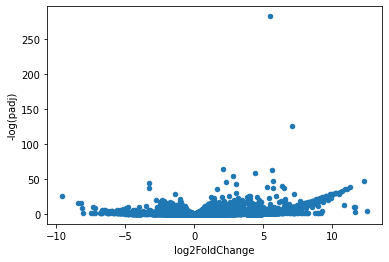

In [117]:
aa = pd.read_table("degseq2/CD120_CC120_transcript.csv", sep="\t")
import numpy as np
aa['-log(padj)'] = -np.log(aa["padj"])
aa.plot.scatter(x="log2FoldChange", y="-log(padj)")

In [69]:
for i in Chag:
    cmd = "Rscript DESeq2.R CD_CC_DD.count.txt CD_CC_DD.condition.txt CD{0},CC{0} ./degseq".format(i)
    cmd2 = "Rscript DESeq2.R CD_CC_DD.count.txt CD_CC_DD.condition.txt CD{0},DD{0} ./degseq".format(i)
    print(cmd)
    print(cmd2)

Rscript DESeq2.R CD_CC_DD.count.txt CD_CC_DD.condition.txt CD12,CC12 ./degseq
Rscript DESeq2.R CD_CC_DD.count.txt CD_CC_DD.condition.txt CD12,DD12 ./degseq
Rscript DESeq2.R CD_CC_DD.count.txt CD_CC_DD.condition.txt CD24,CC24 ./degseq
Rscript DESeq2.R CD_CC_DD.count.txt CD_CC_DD.condition.txt CD24,DD24 ./degseq
Rscript DESeq2.R CD_CC_DD.count.txt CD_CC_DD.condition.txt CD36,CC36 ./degseq
Rscript DESeq2.R CD_CC_DD.count.txt CD_CC_DD.condition.txt CD36,DD36 ./degseq
Rscript DESeq2.R CD_CC_DD.count.txt CD_CC_DD.condition.txt CD48,CC48 ./degseq
Rscript DESeq2.R CD_CC_DD.count.txt CD_CC_DD.condition.txt CD48,DD48 ./degseq
Rscript DESeq2.R CD_CC_DD.count.txt CD_CC_DD.condition.txt CD60,CC60 ./degseq
Rscript DESeq2.R CD_CC_DD.count.txt CD_CC_DD.condition.txt CD60,DD60 ./degseq
Rscript DESeq2.R CD_CC_DD.count.txt CD_CC_DD.condition.txt CD72,CC72 ./degseq
Rscript DESeq2.R CD_CC_DD.count.txt CD_CC_DD.condition.txt CD72,DD72 ./degseq
Rscript DESeq2.R CD_CC_DD.count.txt CD_CC_DD.condition.txt CD84,

In [ ]:
df["abslog2FoldChange"] = abs(df["log2FoldChange"])
    df = df.query('abslog2FoldChange >=1 & padj < 0.01')

In [81]:
def readFC(file, name):
    fc = pd.read_table(file, index_col=0, header=0)
    fc["abslog2FoldChange"] = abs(fc["log2FoldChange"])
    fc = fc.query('abslog2FoldChange >=1 & padj < 0.01')
    fc = fc[["log2FoldChange"]]
    fc.columns = [name]
    return fc

CD_CC_DD_fc = pd.DataFrame()

fcdir = "/Users/yuanzan/Documents/phd/tomato_metabolic/data/番茄转录组数据分析/CD_CC_DD/degseq/"
for i in Chag:
    fcfile = "{0}/CD{1}_CC{1}_transcript.csv".format(fcdir, i)
    name = "CD_{0}_CC_{0}".format(i)
    logfc = readFC(fcfile, name)
    CD_CC_DD_fc = pd.concat([CD_CC_DD_fc, logfc], axis=1)
    
for i in Chag:
    fcfile = "{0}/CD{1}_DD{1}_transcript.csv".format(fcdir, i)
    name = "CD_{0}_DD_{0}".format(i)
    logfc = readFC(fcfile, name)
    CD_CC_DD_fc = pd.concat([CD_CC_DD_fc, logfc], axis=1)
    
    
CD_CC_DD_fc = CD_CC_DD_fc.fillna(0)  
CD_CC_DD_fc[CD_CC_DD_fc>0] = 1
CD_CC_DD_fc[CD_CC_DD_fc<0] = -1

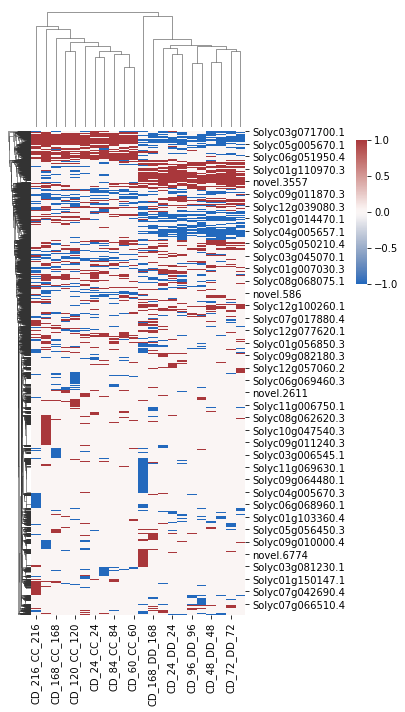

In [87]:
import seaborn as sns
x = sns.clustermap(
    CD_CC_DD_fc,
    figsize=(5, 10),
    col_cluster=True,
    dendrogram_ratio=(.1, .2),
    cmap="vlag",
    
    cbar_pos=(1, 0.6, .03, .2)
)

x.savefig("CD_CC_CD_DD_all_DEgene_cluster.pdf")

In [90]:
CD_CC_DD_fc.shape

(10654, 22)

## re analysis

In [151]:
count_all = pd.read_table("~/Documents/phd/tomato_metabolic/count.annot.txt", index_col=0)
count_all = count_all.loc[:,count_all.columns[count_all.columns.str.contains("h-")]]
count_all.index = count_all.index.str.lstrip("gene:")
count_all.columns = count_all.columns+"_count"
count_all = count_all.loc[:,count_all.columns.isin(["CD96h-2_count", "C24h-3_count", "CD84h-2_count"])==False]

genes = pd.DataFrame(count_all.index, index =count_all.index)
ovels = count_all[genes.index.str.startswith("ovel")].index
novels = "n" + ovels
genes.loc[ovels,'ID']=novels
count_all.index = genes['ID']
count_all.shape

(35932, 171)

In [153]:
count_all.to_csv("CD_Cc_DD_count_all.txt", sep="\t")

In [134]:
q = pd.read_table("~/Documents/phd/tomato_metabolic/count.annot.txt", index_col=0).index

In [139]:
q.str.lstrip("gene:")

Index(['Solyc00g011560.1', 'Solyc00g011660.1', 'Solyc00g013170.1',
       'Solyc00g013180.1', 'Solyc00g014790.2', 'Solyc00g014800.1',
       'Solyc00g014810.1', 'Solyc00g014850.1', 'Solyc00g014860.1',
       'Solyc00g015600.1',
       ...
       'ovel.649', 'ovel.647', 'ovel.650', 'ovel.1709', 'ovel.870', 'ovel.869',
       'ovel.873', 'ovel.872', 'ovel.871', 'ovel.874'],
      dtype='object', name='ID', length=35932)

In [140]:
count_all.index

Index(['Solyc00g011560.1', 'Solyc00g011660.1', 'Solyc00g013170.1',
       'Solyc00g013180.1', 'Solyc00g014790.2', 'Solyc00g014800.1',
       'Solyc00g014810.1', 'Solyc00g014850.1', 'Solyc00g014860.1',
       'Solyc00g015600.1',
       ...
       'ovel.649', 'ovel.647', 'ovel.650', 'ovel.1709', 'ovel.870', 'ovel.869',
       'ovel.873', 'ovel.872', 'ovel.871', 'ovel.874'],
      dtype='object', name='ID', length=35932)

In [113]:
for i in Chag:
    cmd = "Rscript DESeq2.R CD_Cc_DD_count_all.txt CD_CC_DD.condition.txt CD{0},CC{0} ./degseq2".format(i)
    cmd2 = "Rscript DESeq2.R CD_Cc_DD_count_all.txt CD_CC_DD.condition.txt CD{0},DD{0} ./degseq2".format(i)
    print(cmd)
    print(cmd2)

Rscript DESeq2.R CD_Cc_DD_count_all.txt CD_CC_DD.condition.txt CD12,CC12 ./degseq2
Rscript DESeq2.R CD_Cc_DD_count_all.txt CD_CC_DD.condition.txt CD12,DD12 ./degseq2
Rscript DESeq2.R CD_Cc_DD_count_all.txt CD_CC_DD.condition.txt CD24,CC24 ./degseq2
Rscript DESeq2.R CD_Cc_DD_count_all.txt CD_CC_DD.condition.txt CD24,DD24 ./degseq2
Rscript DESeq2.R CD_Cc_DD_count_all.txt CD_CC_DD.condition.txt CD36,CC36 ./degseq2
Rscript DESeq2.R CD_Cc_DD_count_all.txt CD_CC_DD.condition.txt CD36,DD36 ./degseq2
Rscript DESeq2.R CD_Cc_DD_count_all.txt CD_CC_DD.condition.txt CD48,CC48 ./degseq2
Rscript DESeq2.R CD_Cc_DD_count_all.txt CD_CC_DD.condition.txt CD48,DD48 ./degseq2
Rscript DESeq2.R CD_Cc_DD_count_all.txt CD_CC_DD.condition.txt CD60,CC60 ./degseq2
Rscript DESeq2.R CD_Cc_DD_count_all.txt CD_CC_DD.condition.txt CD60,DD60 ./degseq2
Rscript DESeq2.R CD_Cc_DD_count_all.txt CD_CC_DD.condition.txt CD72,CC72 ./degseq2
Rscript DESeq2.R CD_Cc_DD_count_all.txt CD_CC_DD.condition.txt CD72,DD72 ./degseq2
Rscr

In [154]:
CD_CC_fc = pd.DataFrame()
CD_DD_fc = pd.DataFrame()


fcdir2 = "/Users/yuanzan/Documents/phd/tomato_metabolic/data/番茄转录组数据分析/CD_CC_DD/degseq2/"
for i in Chag:
    fcfile = "{0}/CD{1}_CC{1}_transcript.csv".format(fcdir2, i)
    name = "CD{0}_CC{0}".format(i)
    logfc = readFC(fcfile, name)
    CD_CC_fc = pd.concat([CD_CC_fc, logfc], axis=1)
    
for i in Chag:
    fcfile = "{0}/CD{1}_DD{1}_transcript.csv".format(fcdir2, i)
    name = "CD{0}_DD{0}".format(i)
    logfc = readFC(fcfile, name)
    CD_DD_fc = pd.concat([CD_DD_fc, logfc], axis=1)
    
print(CD_CC_fc.shape)
print(CD_DD_fc.shape)

(4607, 11)
(4361, 11)


In [155]:
CD_CC_DD_fc = pd.concat([CD_CC_fc, CD_DD_fc], axis=1)
CD_CC_DD_fc.shape

(6547, 22)

In [156]:
len(CD_CC_fc[CD_CC_fc.index.isin(CD_DD_fc.index)])

2421

In [157]:
CD_CC_DD_fc = CD_CC_DD_fc.fillna(0)  
CD_CC_DD_fc[CD_CC_DD_fc>0] = 1
CD_CC_DD_fc[CD_CC_DD_fc<0] = -1

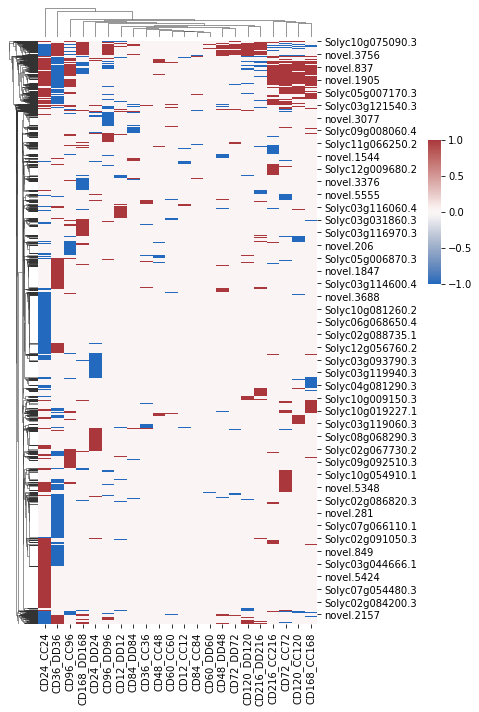

In [158]:
x = sns.clustermap(
    CD_CC_DD_fc,
    figsize=(6, 10),
    col_cluster=True,
    dendrogram_ratio=(.1, .05),
    cmap="vlag",
    
    cbar_pos=(1, 0.6, .03, .2)
)
x.savefig("CD_CC_CD_DD_all_DEgene_cluster.pdf")

In [164]:
CC_DD_overlap_DEgenes_7860 = pd.read_table("~/Documents/github/seqyuan/tomato_graft_omics/notebooks/CC_DD_DE_overlap/CC_DD_overlap_DEgenes.csv", 
                                           header=None)
CC_DD_overlap_DEgenes_7860.shape

(7860, 1)

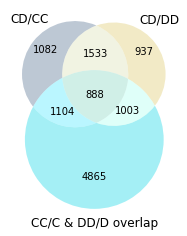

In [175]:
CD_CC_genesSet = set(CD_CC_fc.index)
CD_DD_genesSet = set(CD_DD_fc.index)
CC_DD_overlap_genesSet = set(CC_DD_overlap_DEgenes_7860[0])

v3 = venn3([CD_CC_genesSet, CD_DD_genesSet, CC_DD_overlap_genesSet], ('CD/CC', 'CD/DD', "CC/C & DD/D overlap"), set_colors=['#5B7695','#E0CC71', '#1DD8E6'])
plt.savefig("CD_CC_DD_DE_genes_overlap_number.pdf")


In [326]:
core_gene = pd.DataFrame(CC_DD_overlap_genesSet)
paichu_gene1 = pd.DataFrame(CD_CC_genesSet)
paichu_gene2 = pd.DataFrame(CD_DD_genesSet)
paichu_gene = pd.concat([paichu_gene1, paichu_gene2], axis=0)
core_gene = core_gene[core_gene[0].isin(paichu_gene[0])==False]
core_gene.to_csv("core_5865_genes.csv", index=False, header=False)
core_gene.shape

(4865, 1)

In [327]:
os.getcwd()

'/Users/yuanzan/Documents/phd/tomato_metabolic/data/番茄转录组数据分析/CD_CC_DD'

In [328]:
!cp core_5865_genes.csv ~/Documents/github/seqyuan/tomato_graft_omics/data

In [203]:
metadata_CD_CC_DD_fc = pd.DataFrame(CD_CC_DD_fc.columns, index = CD_CC_DD_fc.columns)
metadata_CD_CC_DD_fc.columns = ["condition"]
metadata_CD_CC_DD_fc["c"] = metadata_CD_CC_DD_fc["condition"].str.split("_", expand=True)[1]
metadata_CD_CC_DD_fc["control"] = metadata_CD_CC_DD_fc["c"].str.split("[0-9]", expand=True)[0]
metadata_CD_CC_DD_fc["HAG"] = metadata_CD_CC_DD_fc["c"].str.split("[A-Z]", expand=True)[2]
metadata_CD_CC_DD_fc["HAG"] = metadata_CD_CC_DD_fc["HAG"].astype(int)
metadata_CD_CC_DD_fc.head(2)

,condition,c,control,HAG
CD12_CC12,CD12_CC12,CC12,CC,12
CD24_CC24,CD24_CC24,CC24,CC,24


In [245]:
count_CD_CC_DD_fc = CD_CC_DD_fc.copy()
count_CD_CC_DD_fc['gene'] = count_CD_CC_DD_fc.index
count_CD_CC_DD_fc = count_CD_CC_DD_fc.melt(id_vars=["gene"])
count_CD_CC_DD_fc['c'] = count_CD_CC_DD_fc["variable"].str.split("_", expand=True)[1]
count_CD_CC_DD_fc['control'] = count_CD_CC_DD_fc["c"].str.split("[0-9]", expand=True)[0]
count_CD_CC_DD_fc['HAG'] = count_CD_CC_DD_fc["c"].str.split("[A-Z]", expand=True)[2]
count_CD_CC_DD_fc['cc'] = 1
count_CD_CC_DD_fc['value'].replace(-1, "down", inplace=True)
count_CD_CC_DD_fc['value'].replace(1, "up", inplace=True)
count_CD_CC_DD_fc['value'].replace(0, "NotDE", inplace=True)

In [248]:
stat_plot = pd.DataFrame(index=Chag, columns=["CD/CC up", "CD/CC down", "CD/DD up", "CD/DD down", "CD/CC CD/DD up overlap", "CD/CC CD/DD down overlap"])

In [288]:
CC_c = count_CD_CC_DD_fc.query('control=="CC"').groupby(['HAG',"value"]).sum().reset_index()
CC_c_up = CC_c.query('value=="up"').sort_values(["HAG"])
stat_plot.loc[CC_c_up['HAG'], "CD/CC up"] = CC_c_up['cc'].to_list()
CC_c_down = CC_c.query('value=="down"').sort_values(["HAG"])
stat_plot.loc[CC_c_up['HAG'], "CD/CC down"] = CC_c_down['cc'].to_list()

DD_c = count_CD_CC_DD_fc.query('control=="DD"').groupby(['HAG',"value"]).sum().reset_index()
DD_c_up = DD_c.query('value=="up"').sort_values(["HAG"])
stat_plot.loc[DD_c_up['HAG'], "CD/DD up"] = CC_c_up['cc'].to_list()
DD_c_down = DD_c.query('value=="down"').sort_values(["HAG"])
stat_plot.loc[DD_c_up['HAG'], "CD/DD down"] = CC_c_down['cc'].to_list()



overlap_up = count_CD_CC_DD_fc.query('value=="up"').groupby(['HAG', 'gene']).sum().reset_index().query('cc>1').groupby(['HAG']).count()["gene"]
stat_plot.loc[overlap_up.index,"CD/CC CD/DD up overlap"] = overlap_up.values

overlap_down = count_CD_CC_DD_fc.query('value=="down"').groupby(['HAG', 'gene']).sum().reset_index().query('cc>1').groupby(['HAG']).count()["gene"]
stat_plot.loc[overlap_down.index,"CD/CC CD/DD down overlap"] = overlap_down.values

<ipython-input-288-05193da21da0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CC_c = count_CD_CC_DD_fc.query('control=="CC"').groupby(['HAG',"value"]).sum().reset_index()
<ipython-input-288-05193da21da0>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DD_c = count_CD_CC_DD_fc.query('control=="DD"').groupby(['HAG',"value"]).sum().reset_index()
<ipython-input-288-05193da21da0>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fun

In [295]:
stat_plot= stat_plot.fillna(0)

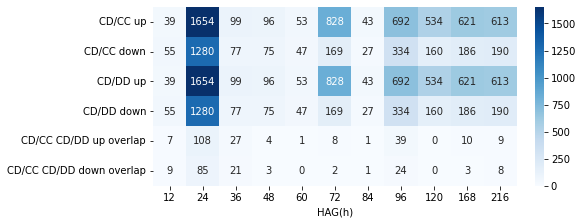

In [318]:
cmap=plt.get_cmap('Blues')
cmap.set_bad(color='w', alpha=1)

fig = plt.figure(figsize=(8,3),constrained_layout=True)
ax = fig.add_gridspec(top=0.8, right=0.8).subplots()

sns.heatmap(stat_plot.T, cmap=cmap, annot=True, ax=ax, fmt='.4g')
ax.set_xlabel("HAG(h)")
fig.savefig('CD-CC_CD-DD_DE_overlap.heatmap.pdf')